# Statistical Analysis

### Possible Research Qs
- Does sleep affect mental health?
- Does diet affect mental health?
- Does financial stress affect mental health?
- Do depressed students perform worse/better academically? (gpa)

In [54]:
# install.packages("dplyr")
library(dplyr)
library(ggplot2)

In [55]:
df = read.csv('clean_dataset.csv')
df = df[,-1]
head(df, 15)

,id,gender,age,academic_pressure,work_pressure,gpa,study_sat,sleep_dur,diet,suicidal_thoughts,study_hrs,financial_stress,family_hist,depression,age_lab,sleep_lab
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>
1,2,Male,33,5,0,8.97,2,'5-6 hours',Healthy,Yes,3,1,No,1,31+,>5
2,8,Female,24,2,0,5.90,5,'5-6 hours',Moderate,No,3,2,Yes,0,23-26,>5
3,26,Male,31,3,0,7.03,5,'Less than 5 hours',Healthy,No,9,1,Yes,0,31+,<5
4,30,Female,28,3,0,5.59,2,'7-8 hours',Moderate,Yes,4,5,Yes,1,27-30,>5
5,32,Female,25,4,0,8.13,3,'5-6 hours',Moderate,Yes,1,1,No,0,23-26,>5
6,33,Male,29,2,0,5.70,3,'Less than 5 hours',Healthy,No,4,1,No,0,27-30,<5
7,52,Male,30,3,0,9.54,4,'7-8 hours',Healthy,No,1,2,No,0,27-30,>5
8,56,Female,30,2,0,8.04,4,'Less than 5 hours',Unhealthy,No,0,1,Yes,0,27-30,<5
9,59,Male,28,3,0,9.79,1,'7-8 hours',Moderate,Yes,12,3,No,1,27-30,>5


## Does Lack of Sleep Affect Depression?

Investigate whether getting less than 5 hours of sleep is associated with a higher rate of depression ($\bar{x}_1$) than that of students who sleep more than 5 hours per night ($\bar{x}_2$). Use significance level $\alpha = 0.01$.

$H_0$: $\bar{x}_1 - \bar{x}_2 = 0$ <br>
$H_A$: $\bar{x}_1 - \bar{x}_2 > 0$ ($\bar{x}_1 > \bar{x}_2$)

In [56]:
# Group dataframe
sleep <- df %>%
    group_by(sleep_lab) %>%
    summarise(
        sum = sum(depression),
        count = n(),
        proportion = sum/count)
sleep

sleep_lab,sum,count,proportion
<chr>,<int>,<int>,<dbl>
<5,5352,8297,0.6450524
>5,10938,19540,0.5597748


In [57]:
# Prop.test
counts = sleep$sum
n = sleep$count
result = prop.test(counts, n, alternative='greater', conf.level=.99)
print(result)
p_value = result$p.value
p_value


	2-sample test for equality of proportions with continuity correction

data:  counts out of n
X-squared = 174.13, df = 1, p-value < 2.2e-16
alternative hypothesis: greater
99 percent confidence interval:
 0.07044064 1.00000000
sample estimates:
   prop 1    prop 2 
0.6450524 0.5597748 



[1] 4.636815e-40

### Interpretation

p-value = $4.637$ x $10^{-40}$ < $0.01 = \alpha$

Therefore, there is evidence at the $99$% confidence level that students who get less than 5 hours of sleep per night have a higher rate of depression than students who get more than 5 hours of sleep per night. We reject the null hypothesis.

## Research Question 2

## What is the True Population Mean of Study Hours Represented in the Population?

95% Confidence Interval: [ 7.115346 7.202433 ]


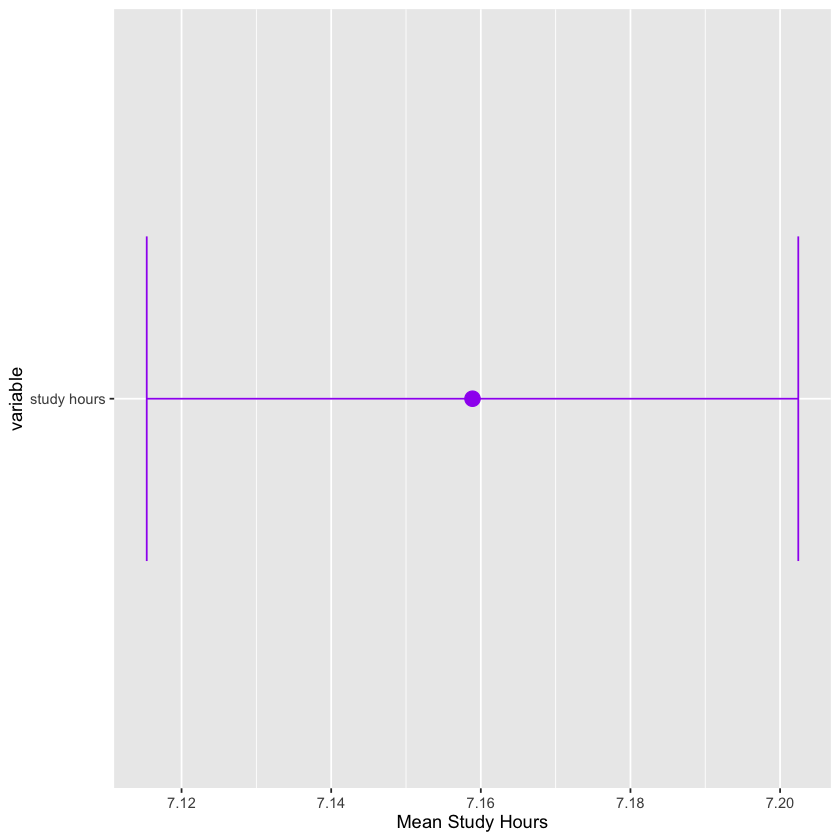

In [97]:
hours = df$study_hrs

mean_val = mean(hours, na.rm = TRUE)
sd_val = sd(hours, na.rm = TRUE)
n = sum(!is.na(hours))
z_crit = qnorm(0.975)
margin_of_error = z_crit * (sd_val / sqrt(n))
ci = c(mean_val - margin_of_error, mean_val + margin_of_error)

plot_df = data.frame(variable = "study hours", mean = mean_val, ci_lower = ci[1], ci_upper = ci[2])
ci_lower = ci[1]
ci_upper = ci[2]
ggplot(plot_df, aes(y=variable, x=mean)) + geom_point(size = 4, color = "purple") + geom_errorbar(aes(xmin=ci_lower, xmax=ci_upper), width =0.5, color = "purple") + labs(x= "Mean Study Hours") 
cat("95% Confidence Interval: [",ci,"]\n")

## Interpretation

We are 95% confident that the true mean of study hours in the population is between $[7.115346, 7.202433]$. 